# Movimiento Browniano y dinámica estocástica

## Dinámica de Langevin

## Partícula libre

La siguiente simulación es ejecutada en los siguientes escenarios:
   - num_particles = 1, num_periods = 500000, temperature = 300 K, friction = 5.0/ps, trajectory_file = '1_free_particle.pkl'
   - num_particles = 10000, num_periods = 10000, temperature = 300 K, friction = 5.0/ps, trajectory_file = '10000_free_particles.pkl'

In [1]:
# Simulación de una partícula libre con dinámica de Langevin

import numpy as np
import pickle
from tqdm import tqdm
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit


num_particles = 10000
mass = 180.15 * unit.amu # masa de la glucosa

temperature = 300*unit.kelvin
friction = 5.0/unit.picosecond

step_size = 0.1*unit.picoseconds
steps_per_period = 100
num_periods = 10000
trajectory_file = '10000_free_particle.pkl'


system = mm.System()

for ii in range(num_particles):
    system.addParticle(mass)

integrator = mm.LangevinIntegrator(temperature, friction, step_size)

platform_name = 'CUDA'
platform = mm.Platform.getPlatformByName(platform_name)

context = mm.Context(system, integrator, platform)

initial_positions  = np.zeros([num_particles, 3], np.float32) * unit.angstroms
initial_velocities = np.zeros([num_particles, 3], np.float32) * unit.angstroms/unit.picoseconds

context.setPositions(initial_positions)
context.setVelocities(initial_velocities)

times = np.zeros([num_periods], np.float32) * unit.picoseconds
positions = np.zeros([num_periods, num_particles, 3], np.float32) * unit.angstroms
velocities = np.zeros([num_periods, num_particles, 3], np.float32) * unit.angstroms/unit.picosecond

state = context.getState(getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()
velocities[0] = state.getVelocities()

for ii in tqdm(range(1,num_periods)):
    context.getIntegrator().step(steps_per_period)
    state = context.getState(getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()
    velocities[ii] = state.getVelocities()

file = open(trajectory_file,'wb')
pickle.dump( times, file )
pickle.dump( positions, file )
pickle.dump( velocities, file )
file.close()

100%|██████████| 9999/9999 [22:38<00:00,  7.28it/s]


Veamos la partícula libre del fichero '1_free_particle.pkl'

In [7]:
file = open('1_free_particle.pkl','rb')

times = pickle.load( file )
positions = pickle.load( file )
velocities = pickle.load( file )

file_trajectory.close()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import simtk.unit as unit

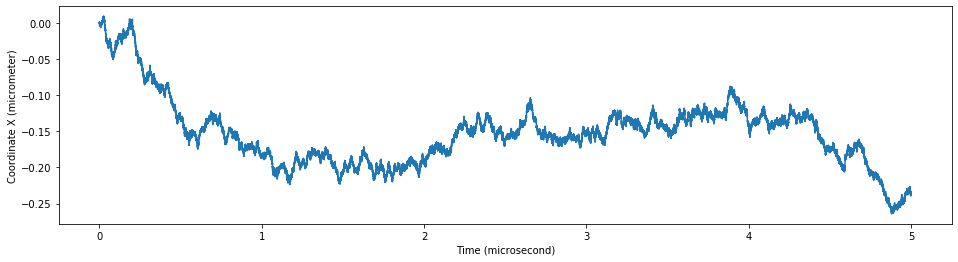

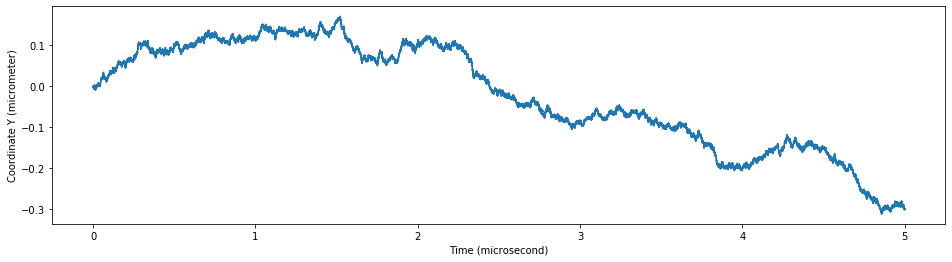

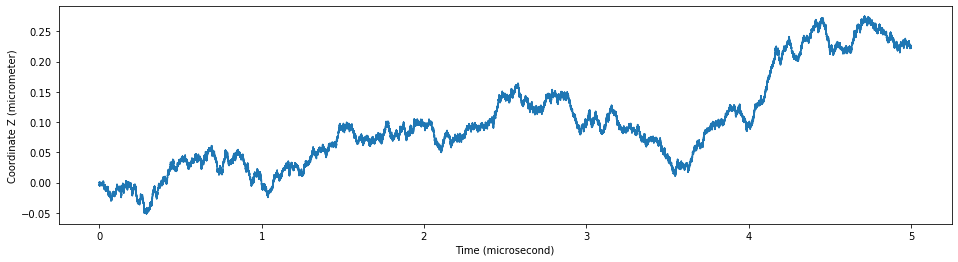

In [11]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.plot(times.in_units_of(unit.microsecond), positions[:,0,0].in_units_of(unit.micrometer))
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate X ({})'.format(unit.micrometer))
plt.show()

plt.plot(times.in_units_of(unit.microsecond), positions[:,0,1].in_units_of(unit.micrometer))
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate Y ({})'.format(unit.micrometer))
plt.show()

plt.plot(times.in_units_of(unit.microsecond), positions[:,0,2].in_units_of(unit.micrometer))
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate Z ({})'.format(unit.micrometer))
plt.show()

In [ ]:
from mpl_toolkits import mplot3d


In [ ]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.plot(times.in_units_of(unit.microsecond), velocities[:,0].in_units_of(unit.micrometer/unit.microsecond))
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate X ({})'.format(unit.micrometer/unit.microsecond))
plt.show()

plt.plot(times.in_units_of(unit.microsecond), velocities[:,1].in_units_of(unit.micrometer/unit.microsecond))
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate Y ({})'.format(unit.micrometer/unit.microsecond))
plt.show()

plt.plot(times.in_units_of(unit.microsecond), velocities[:,2].in_units_of(unit.micrometer/unit.microsecond))
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate Z ({})'.format(unit.micrometer/unit.microsecond))
plt.show()

In [ ]:
def cumulative_average(serie):
    
    result = np.copy(serie)
    size = len(serie)
    
    for ii in range(size-1):
        value_to_add = result[ii]
        for jj in range(ii+1,size):
            result[jj] = serie[jj] + value_to_add
    
    for ii in range(size):
        result[ii]=result[ii]/(ii+1)
    
    return result

In [ ]:
aa = cumulative_average([10.0,10.0,10.0,10.0])

In [ ]:
aa

In [ ]:
#kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA

#kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA